In [1]:
import numpy as np
import pandas as pd
import wandb
import os
from matplotlib import pyplot as plt

import torch
import torch.nn 
import torch.optim 
from torch.utils.data import DataLoader

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import transformers
from transformers import BertTokenizer

from Model import BertClass, AmazonTitles_Dataset
from Evaluation_Metrics import plot_c_matrix, report_scores

In [2]:
model=BertClass()

In [6]:
save_path="../Save_Model/bert_sentiment_model_new_final.pth"
model.load_state_dict(torch.load(save_path, map_location=torch.device('cpu')))

<All keys matched successfully>

In [14]:
device="cpu"

In [7]:
df=pd.read_csv("../Final_Datasets/Dataset_1_train.csv")
df.polarity=df.polarity-1

In [9]:
#Divide test train and validation set
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df['polarity'])
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42, stratify=train_data['polarity'])

test_data = test_data.reset_index(drop=True)

In [11]:
#Set hyperparmeters
MAX_LEN=512
VALID_BATCH_SIZE=4

#Initialize a BERT tokenizer from the 'bert-base-cased' pre-trained model.
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

#Instantiate train and test datasets from Amazon class
testing_set = AmazonTitles_Dataset(test_data, tokenizer, MAX_LEN)

In [12]:
test_params = {
    'batch_size': VALID_BATCH_SIZE,  
    'shuffle': True,  
    'num_workers': 0  
}

In [13]:
testing_loader = DataLoader(testing_set, **test_params)

In [16]:
test_loss, test_accuracy, all_predictions, all_targets=model.test_model(testing_loader, device)

In [17]:
report_scores(all_targets, all_predictions)

              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88     20000
         1.0       0.86      0.93      0.89     20000

    accuracy                           0.89     40000
   macro avg       0.89      0.89      0.89     40000
weighted avg       0.89      0.89      0.89     40000



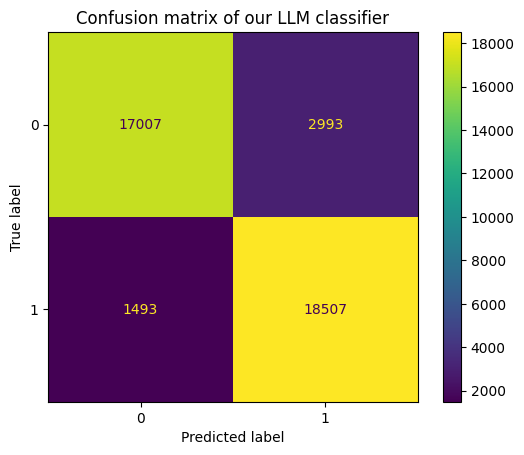

In [18]:
plot_c_matrix(all_targets, all_predictions, "our LLM classifier")